In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Define class names and the 5 classes to be used: bird, cat, deer, dog, horse
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
chosen_classes = ['bird', 'cat', 'deer', 'dog', 'horse']
class_indices = [2, 3, 4, 5, 7]

# Flatten the target labels
y_train = y_train.flatten()
y_test = y_test.flatten()

In [2]:
train_filter = np.isin(y_train, class_indices)
x_train = x_train[train_filter]
y_train = y_train[train_filter]

# Sample 1500 images per class for validation
sample_per_class = 1500
validation_indices = []

In [3]:
for class_idx in class_indices:
    class_filter = np.where(y_train == class_idx)[0]  # Get indices for the current class
    validation_indices.extend(np.random.choice(class_filter, size=sample_per_class, replace=False))

In [4]:
x_val = x_train[validation_indices]
y_val = y_train[validation_indices]

# Remove validation data from the training set
train_indices = list(set(np.arange(len(x_train))) - set(validation_indices))
x_train = x_train[train_indices]
y_train = y_train[train_indices]

# Map labels to 0-4 range (bird=0, cat=1, deer=2, dog=3, horse=4)
class_map = {2: 0, 3: 1, 4: 2, 5: 3, 7: 4}
y_train = np.vectorize(class_map.get)(y_train)
y_val = np.vectorize(class_map.get)(y_val)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation

# Create the generators
train_generator = train_datagen.flow(x_train, y_train, batch_size=64)
val_generator = val_datagen.flow(x_val, y_val, batch_size=64)

In [12]:
from keras import optimizers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
   
    layers.Conv2D(64, (3, 3), activation='relu',strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),
    
    layers.Conv2D(128, (3, 3), activation='relu',strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu',strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),
    
    layers.Conv2D(128, (3, 3), activation='relu',strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes: bird, cat, deer, dog, horse
])

# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model1.h5', monitor='val_loss', save_best_only=True)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 64,  # Number of batches per epoch
    epochs=200,
    validation_data=val_generator,
    validation_steps=len(x_val) // 64,# Number of batches per validation step
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/200
273/273 [==============================] - 101s 370ms/step - loss: 1.3263 - accuracy: 0.4417 - val_loss: 1.2915 - val_accuracy: 0.4690
Epoch 2/200
273/273 [==============================] - 155s 569ms/step - loss: 1.2738 - accuracy: 0.4684 - val_loss: 1.2136 - val_accuracy: 0.4948
Epoch 3/200
273/273 [==============================] - 146s 535ms/step - loss: 1.2232 - accuracy: 0.4942 - val_loss: 1.2153 - val_accuracy: 0.5033
Epoch 4/200
273/273 [==============================] - 109s 397ms/step - loss: 1.1978 - accuracy: 0.5068 - val_loss: 1.1060 - val_accuracy: 0.5593
Epoch 5/200
273/273 [==============================] - 144s 528ms/step - loss: 1.1674 - accuracy: 0.5191 - val_loss: 1.1507 - val_accuracy: 0.5345
Epoch 6/200
273/273 [==============================] - 144s 528ms/step - loss: 1.1365 - accuracy: 0.5384 - val_loss: 1.1569 - val_accuracy: 0.5423
Epoch 7/200
273/273 [==============================] - 149s 546ms/step - loss: 1.1201 - accuracy: 0.5490 - val_loss: 1

Epoch 112/200
273/273 [==============================] - 76s 280ms/step - loss: 0.4768 - accuracy: 0.8267 - val_loss: 0.6665 - val_accuracy: 0.7754
Epoch 113/200
273/273 [==============================] - 76s 280ms/step - loss: 0.4720 - accuracy: 0.8260 - val_loss: 0.5515 - val_accuracy: 0.8141
Epoch 114/200
273/273 [==============================] - 76s 277ms/step - loss: 0.4704 - accuracy: 0.8231 - val_loss: 0.5367 - val_accuracy: 0.8121
Epoch 115/200
273/273 [==============================] - 76s 278ms/step - loss: 0.4668 - accuracy: 0.8266 - val_loss: 0.6318 - val_accuracy: 0.7808
Epoch 116/200
273/273 [==============================] - 76s 279ms/step - loss: 0.4711 - accuracy: 0.8259 - val_loss: 0.5839 - val_accuracy: 0.8053
Epoch 117/200
273/273 [==============================] - 76s 278ms/step - loss: 0.4581 - accuracy: 0.8341 - val_loss: 0.5699 - val_accuracy: 0.8072
Epoch 118/200
273/273 [==============================] - 76s 277ms/step - loss: 0.4665 - accuracy: 0.8262 - val_

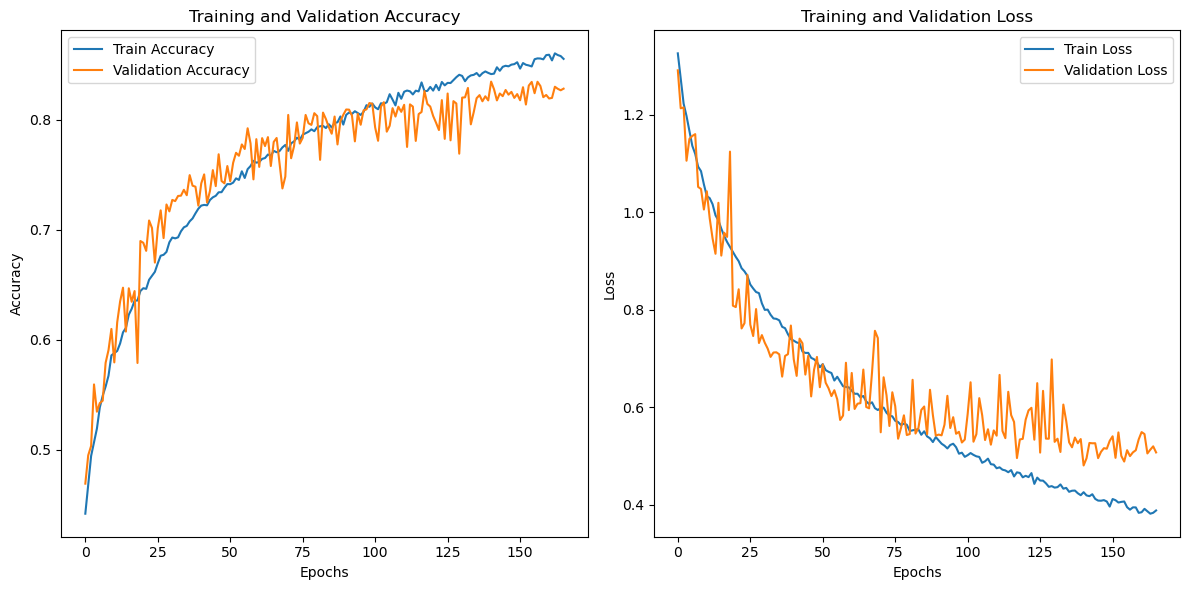

In [17]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [18]:
model.save('C:/Users/User/Documents/ai/multimodel1.h5')